### Import matplotlib, numpy etc

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Import pandas

In [2]:
import pandas as pd

### Create numpy array with your data

In [3]:
A = np.array([[1,2,3,4,5], [10,20,30,40,50], [11,22,33,44,55]])
A

array([[ 1,  2,  3,  4,  5],
       [10, 20, 30, 40, 50],
       [11, 22, 33, 44, 55]])

### and a list with your index (row names) and column names

In [4]:
index = ['a','b','c']
cols = ['A','B','C','D','E']

### using pandas you can store all this into a 'DataFrame'

In [22]:
df = pd.DataFrame(data=A, index=index, columns=cols)
df

,A,B,C,D,E
a,1,2,3,4,5
b,10,20,30,40,50
c,11,22,33,44,55


### Accessing via column by names ([ ] operator)

In [8]:
df['B']

a     2
b    20
c    22
Name: B, dtype: int64

### Access via row name (.loc)

In [9]:
df.loc['a']

A    1
B    2
C    3
D    4
E    5
Name: a, dtype: int64

### Access via row position (.iloc)

In [10]:
df.iloc[1]

A    10
B    20
C    30
D    40
E    50
Name: b, dtype: int64

### Mixed name and position (.ix)

In [31]:
df.ix['a',1]

2

### Acessing single elements

In [29]:
df.loc['a','B']

2

In [30]:
df.iloc[0,1]

2

### Fast access to single values

In [32]:
df.at['a','C']

3

In [33]:
df.iat[0,2]

3

### Slicing

In [36]:
df.iloc[:,0:3]

,A,B,C
a,1,2,3
b,10,20,30
c,11,22,33


### Slicing with skipped rows

In [37]:
df.iloc[::2,:]

,A,B,C,D,E
a,1,2,3,4,5
c,11,22,33,44,55


### or you use boolean indexing!

#### logical comparison returns a DataFrame with boolean entries

In [19]:
df[['A','C']]>10

,A,C
a,False,False
b,False,True
c,True,True


#### these can be used for indexing

In [38]:
df_g2 = df[df[['A','B']]>2]
df_g2

,A,B,C,D,E
a,NaN,NaN,NaN,NaN,NaN
b,10,20,NaN,NaN,NaN
c,11,22,NaN,NaN,NaN


### you can drop all rows that have only NaN entries

In [41]:
df_g2.dropna( axis=0, how='all')

,A,B,C,D,E
b,10,20,NaN,NaN,NaN
c,11,22,NaN,NaN,NaN


### or all columns with at least one NaN entry

In [42]:
df_g2.dropna( axis=1, how='any')

""
a
b
c


### selecting rows which contain certain values

In [43]:
df[ df["A"].isin([1, 11]) ]

,A,B,C,D,E
a,1,2,3,4,5
c,11,22,33,44,55


### Acessing the "raw" numpy data

In [44]:
df.values

array([[ 1,  2,  3,  4,  5],
       [10, 20, 30, 40, 50],
       [11, 22, 33, 44, 55]])

### Sorting

In [46]:
df.sort_values(by="A", ascending=False)

,A,B,C,D,E
c,11,22,33,44,55
b,10,20,30,40,50
a,1,2,3,4,5


### Appending two data frames

In [50]:
df2 = pd.DataFrame( np.random.rand(3,5), columns=df.columns )
pd.concat( [df, df2])

,A,B,C,D,E
a,1.000000,2.000000,3.000000,4.000000,5.000000
b,10.000000,20.000000,30.000000,40.000000,50.000000
c,11.000000,22.000000,33.000000,44.000000,55.000000
0,0.285109,0.172316,0.400019,0.344001,0.065652
1,0.686239,0.713619,0.004903,0.223297,0.282492
2,0.786840,0.081758,0.683350,0.364533,0.244403


### Dataframes can also be merged (joined)

In [53]:
df2 = pd.DataFrame( [[50, 'eins'], [5, 'zwei'], [55, 'drei']], columns=["E2", "no"])
df3 = pd.merge(df, df2, left_on="E", right_on="E2")
df3.drop("E2", axis=1, inplace=True)
df3

,A,B,C,D,E,no
0,1,2,3,4,5,zwei
1,10,20,30,40,50,eins
2,11,22,33,44,55,drei


# Importing data using pandas (repetition from Data I/O session)

In [60]:
diamonds = pd.read_csv('diamonds.csv',index_col=0)

### Show only the first 5 rows of this huge data set

In [61]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


### or the last 5

In [62]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


### get some infos about the DataFrame

In [63]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


### or some basic statistics

In [64]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### or even the correlation between the columns

In [65]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


### Compute mean values for each cut

In [69]:
diamonds.groupby("cut").mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


# Plotting

### Pandas DataFrames have include the pyplot.plot function

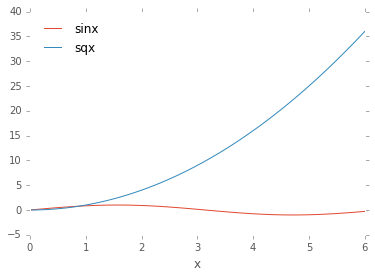

In [70]:
x = np.linspace(0, 6, 100)
a = np.array( [x, np.sin(x), x*x] ).transpose()
df = pd.DataFrame( a, columns=["x", "sinx", "sqx"] )
df.plot(x="x", y=["sinx", "sqx"])

### Scatterplot

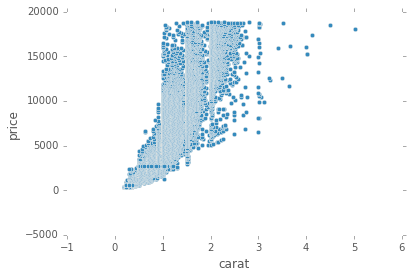

In [71]:
diamonds.plot(x="carat", y="price", kind='scatter')

### Histogramm of diamond prices

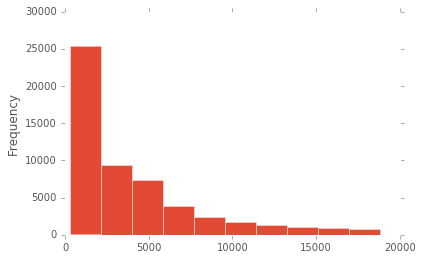

In [72]:
diamonds["price"].plot(kind="hist")

### Bar plot

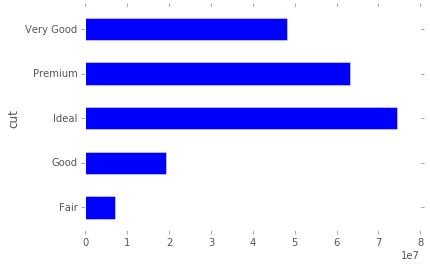

In [77]:
diamonds.groupby("cut")["price"].sum().plot(kind="barh")

### Stacked bar plot

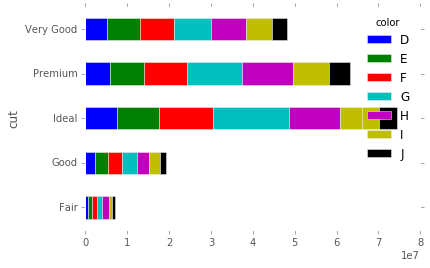

In [40]:
price_per_color = diamonds.groupby( ["cut", "color"] )["price"].sum().unstack()
price_per_color.plot(kind="barh", stacked=True)
#price_per_color

In [81]:
price_per_color = diamonds.groupby( ["cut", "color"] )["price"].sum().unstack()
price_per_color



color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,699443,824838,1194025,1331126,1556112,819953,592103
Good,2254363,3194260,3177637,3591553,3001931,2650994,1404271
Ideal,7450854,10138238,12912518,18171930,12115278,9317974,4406695
Premium,5820962,8270443,10081319,13160170,12311428,8491146,5086030
Very Good,5250817,7715165,8177367,8903461,8272552,6328079,3460182
